<a href="https://colab.research.google.com/github/AdamSerrakh/FormationGreta/blob/main/DevoirMaisonCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True )

Mounted at /content/drive/


In [2]:
import os
pathTrain = "/content/drive/MyDrive/afhq/train"
pathVal = "/content/drive/MyDrive/afhq/val"
os.chdir(pathTrain)
os.chdir(pathVal)

In [3]:
import numpy as np
import time
np.random.seed(123)
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Conv2DTranspose, Reshape, Dense, Activation, Flatten, Dropout, Convolution2D, MaxPooling2D, Input
from matplotlib import pyplot

In [4]:
def affiche(history):
 # summarize history for accuracy
 plt.plot(history.history['accuracy'])
 plt.plot(history.history['val_accuracy'])
 plt.title('model accuracy')
 plt.ylabel('accuracy')
 plt.xlabel('epoch')
 plt.legend(['train', 'test'], loc='upper left')
 plt.show()
 # summarize history for loss
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.title('model loss')
 plt.ylabel('loss')
 plt.xlabel('epoch')
 plt.legend(['train', 'test'], loc='upper left')
 plt.show()

In [5]:
train_data = tf.keras.utils.image_dataset_from_directory(pathTrain,
                                                        seed = 123, shuffle = True, image_size = (224,224),
                                                        batch_size = 50)
test_data = tf.keras.utils.image_dataset_from_directory(pathVal,
                                                       seed = 123, shuffle = True, image_size =(224,224),
                                                       batch_size = 50)

Found 14630 files belonging to 3 classes.
Found 1520 files belonging to 3 classes.


In [9]:
model = Sequential()
model.add(Input(shape=(224,224,3)))

model.add(Convolution2D(8, kernel_size = (3, 3), activation='relu' ))
model.add(Convolution2D(16, kernel_size = (3, 3), activation='relu' ))

model.add( MaxPooling2D((3, 3)))

model.add(Flatten())

model.add(Dense(units=32, activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(units=3, activation="softmax"))

model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 8)       224       
                                                                 
 conv2d_3 (Conv2D)           (None, 220, 220, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 85264)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                2728480   
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                      

Epoch 1/10
293/293 [==============================] - 1213s 4s/step - loss: 8.7672 - accuracy: 0.3473 - val_loss: 1.0988 - val_accuracy: 0.3355
Epoch 2/10
293/293 [==============================] - 48s 159ms/step - loss: 1.0979 - accuracy: 0.3522 - val_loss: 1.0992 - val_accuracy: 0.3355
Epoch 3/10
293/293 [==============================] - 50s 166ms/step - loss: 1.0979 - accuracy: 0.3522 - val_loss: 1.0993 - val_accuracy: 0.3355
Epoch 4/10
293/293 [==============================] - 48s 159ms/step - loss: 1.0979 - accuracy: 0.3522 - val_loss: 1.0992 - val_accuracy: 0.3355
Epoch 5/10
293/293 [==============================] - 49s 164ms/step - loss: 1.0979 - accuracy: 0.3522 - val_loss: 1.0993 - val_accuracy: 0.3355
Epoch 6/10
293/293 [==============================] - 48s 158ms/step - loss: 1.0979 - accuracy: 0.3522 - val_loss: 1.0993 - val_accuracy: 0.3355
Epoch 7/10
293/293 [==============================] - 50s 168ms/step - loss: 1.0979 - accuracy: 0.3522 - val_loss: 1.0993 - val_acc

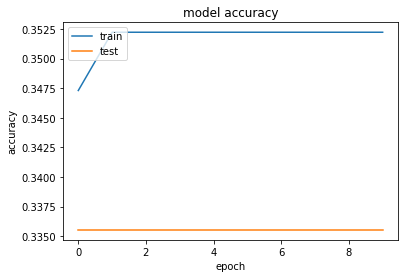

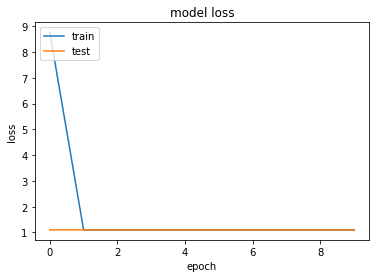

batch_size= 500 epochs= 10
Temps d apprentissage 1718.5978556489995


In [10]:
from tensorflow.keras.optimizers import  Adam

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

tps1 = time.perf_counter()

history = model.fit(train_data, batch_size=500, epochs=10,verbose=1,validation_data=test_data)

tps2 = time.perf_counter()


affiche(history) #donnee en annexe
print('batch_size=', 500, 'epochs=', 10)
print('Temps d apprentissage',tps2 - tps1)